In [402]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import gaussian_kde
import lec3_graphs as gfx

In [403]:
x_axis = np.linspace(-3, 3)
y_axis = x_axis ** 2 

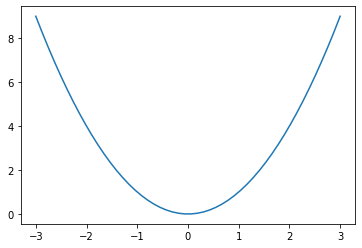

In [404]:
plt.plot(x_axis, y_axis) 

In [405]:
df = pd.read_csv('datasets/qog_std_cs_jan18.csv')

In [406]:
#df.shape
df.head(4)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
df.sample()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
27,112,Belarus,BLR,370.0,112.0,QoGStdCSJan18,NaN,NaN,23.0,11.0,...,2.07181,2.34197,2.007462,4.780829,5.778168,5.558358,3.250939,NaN,NaN,0.352243


(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <BarContainer object of 10 artists>)

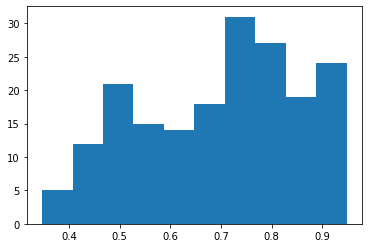

In [408]:
plt.hist(df['undp_hdi'].dropna())

In [409]:
df[df['undp_hdi'].isna()]['cname']

37               Taiwan
89         Korea, North
111              Monaco
119               Nauru
129    Marshall Islands
148          San Marino
159             Somalia
179              Tuvalu
Name: cname, dtype: object

In [410]:
df.shape

(194, 1882)

In [411]:
hdi_dropna = df['undp_hdi'].dropna()
hdi_dropna

0      0.479
1      0.762
2      0.743
3      0.857
4      0.531
       ...  
189    0.697
190    0.769
191    0.702
192    0.499
193    0.576
Name: undp_hdi, Length: 186, dtype: float64

Text(0, 0.5, 'Frecuencia')

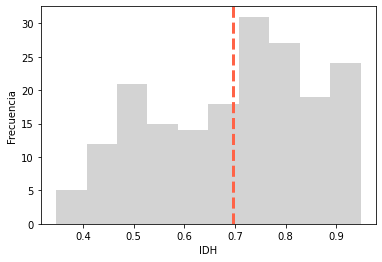

In [412]:
plt.hist(hdi_dropna, color='lightgrey')
plt.axvline(hdi_dropna.mean(), lw = 3, color= 'tomato', linestyle = '--')
plt.xlabel('IDH')
plt.ylabel('Frecuencia')

In [413]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region']]
hdi_group.head()

,cname,ccode,undp_hdi,ht_region
0,Afghanistan,4,0.479,8
1,Albania,8,0.762,1
2,Algeria,12,0.743,3
3,Andorra,20,0.857,5
4,Angola,24,0.531,4


In [414]:
hdi_group['region_record'] = hdi_group['ht_region'].replace([1,2,3,4,5,6,7,8,9,10], 
                                                            ['EastEurope', 'LatAm', 'NorthAfrica', 'SudSaharian', 
                                                            'WesternDem', 'EastAsia', 'SouthEastAsia', 'SoutAsia', 
                                                            'Pacific', 'Caribbean'])

In [415]:
hdi_group.head()

,cname,ccode,undp_hdi,ht_region,region_record
0,Afghanistan,4,0.479,8,SoutAsia
1,Albania,8,0.762,1,EastEurope
2,Algeria,12,0.743,3,NorthAfrica
3,Andorra,20,0.857,5,WesternDem
4,Angola,24,0.531,4,SudSaharian


In [416]:
hdi_group.groupby('region_record')['undp_hdi'].mean()

region_record
Caribbean        0.741154
EastAsia         0.817000
EastEurope       0.780679
LatAm            0.721500
NorthAfrica      0.748300
Pacific          0.643000
SoutAsia         0.605125
SouthEastAsia    0.695545
SudSaharian      0.508813
WesternDem       0.902360
Name: undp_hdi, dtype: float64

In [417]:
for i in hdi_group['region_record'].unique():
    print(i, hdi_group[hdi_group['region_record'] == i]['undp_hdi'].mean())

SoutAsia 0.6051249925
EastEurope 0.7806785735714287
NorthAfrica 0.7483000004999999
WesternDem 0.9023600028000002
SudSaharian 0.50881250125
Caribbean 0.7411538446153846
LatAm 0.7215000034999999
Pacific 0.6430000066666666
SouthEastAsia 0.6955454572727272
EastAsia 0.8170000024999999


In [418]:
hdi_groupby_means = hdi_group.groupby('region_record')['undp_hdi'].mean()
hdi_groupby_means

region_record
Caribbean        0.741154
EastAsia         0.817000
EastEurope       0.780679
LatAm            0.721500
NorthAfrica      0.748300
Pacific          0.643000
SoutAsia         0.605125
SouthEastAsia    0.695545
SudSaharian      0.508813
WesternDem       0.902360
Name: undp_hdi, dtype: float64

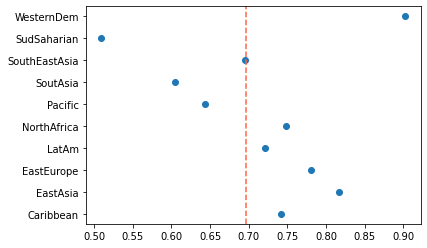

In [419]:
plt.plot(hdi_groupby_means.values, hdi_groupby_means.index, 'o')
plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle = '--')

In [420]:
mu = hdi_dropna.mean()
sigma = hdi_dropna.var()
print(f'''
La media de IDH es de: {mu}
Y su varianza es de: {sigma}''')


La media de IDH es de: 0.6958010768279569
Y su varianza es de: 0.02411465796313719


(0.3, 1.0)

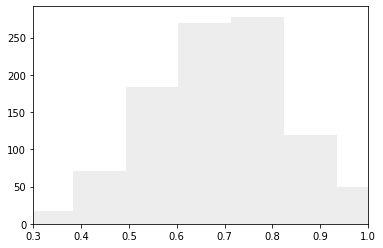

In [421]:
simulate_normal = np.random.normal(mu, np.sqrt(sigma), 1000)
plt.hist(simulate_normal, color='lightgrey', alpha = .4)
plt.xlim(.3, 1)




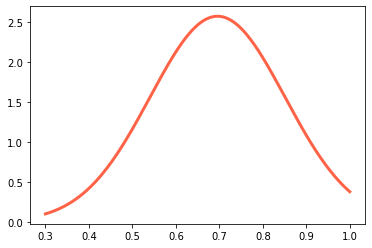

In [422]:
x_axis_s = np.linspace(.3, 1, 1000)
simulate_normal_pdf = norm.pdf(x_axis_s,mu,np.sqrt(sigma))
plt.plot(x_axis_s, simulate_normal_pdf, color = 'tomato', lw = 3)

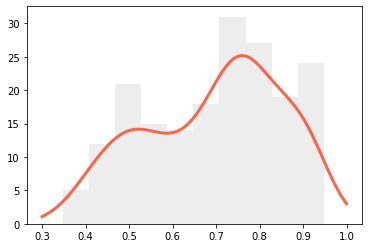

In [423]:
plt.hist(hdi_dropna, color = 'lightgrey', alpha = .4)
x_axis = np.linspace(.3,1,100)
gauss_norm = gaussian_kde(hdi_dropna)
Z = (np.reshape(gauss_norm(x_axis).T,x_axis.shape)) * 10
plt.plot(x_axis, Z, color = 'tomato', lw = 3)

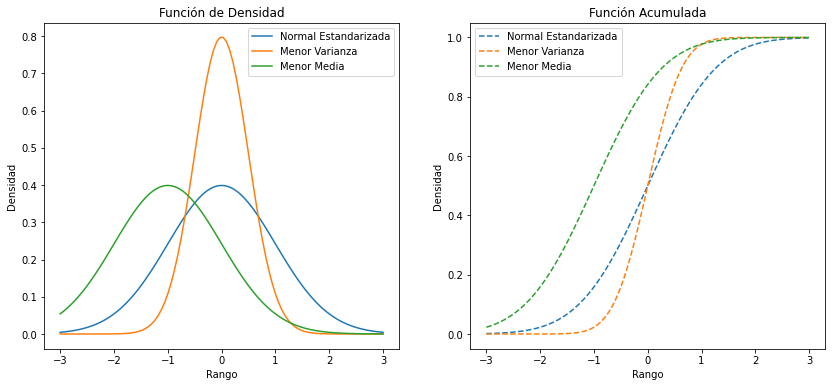

In [424]:
plt.figure(figsize = (14,6))
gfx.normal_distributions()

(array([115.,  35.,  15.,  16.,   5.,   3.,   0.,   0.,   0.,   3.]),
 array([   324.16 ,  11139.857,  21955.554,  32771.251,  43586.948,
         54402.645,  65218.342,  76034.039,  86849.736,  97665.433,
        108481.13 ]),
 <BarContainer object of 10 artists>)

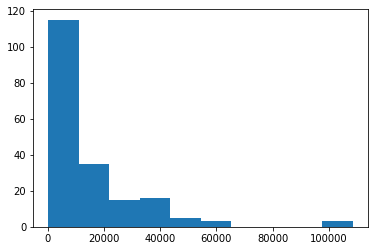

In [425]:
gdp = df['gle_cgdpc'].dropna()
plt.hist(gdp)

(array([ 3., 14., 19., 24., 27., 26., 30., 25., 19.,  5.]),
 array([ 5.78123722,  6.36254665,  6.94385608,  7.52516551,  8.10647494,
         8.68778437,  9.2690938 ,  9.85040323, 10.43171266, 11.01302209,
        11.59433152]),
 <BarContainer object of 10 artists>)

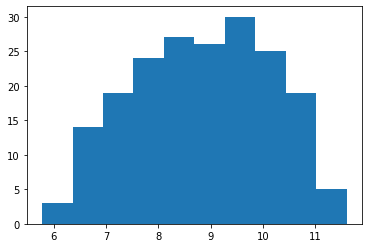

In [426]:
plt.hist(np.log(gdp))

Text(0.5, 1.0, 'GDP')

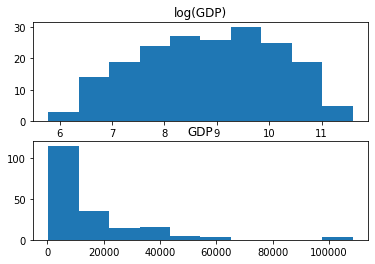

In [427]:
plt.subplot(2,1,1)
plt.hist(np.log(gdp))
plt.title('log(GDP)')
plt.subplot(2,1,2)
plt.hist(gdp)
plt.title('GDP')

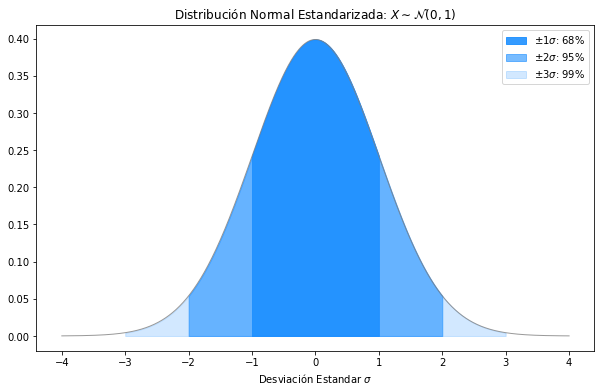

In [428]:
plt.figure(figsize = (10,6))
gfx.normal_distribution_sigma()

In [429]:
chile_hdi = df[df['cname'] == 'Chile']['undp_hdi']
chile_hdi

35    0.845
Name: undp_hdi, dtype: float64

In [430]:
chile_zscore = (chile_hdi - df['undp_hdi'].mean()) / df['undp_hdi'].std()
chile_zscore

35    0.960783
Name: undp_hdi, dtype: float64

In [431]:
def get_zscore(col, case):
    get_point = df[df['cname'] == case][col]
    preproc = df[col].dropna()
    get_mean = preproc.mean()
    get_std = preproc.std()
    return (get_point - get_mean) / get_std

In [432]:
chile_zscore == get_zscore('undp_hdi', 'Chile')

35    False
Name: undp_hdi, dtype: bool